In [1]:
import pandas as pd

# read_csv 함수로 데이터를 DataFrame 형태로 불러오기

file_path = "./data/chipotle.tsv"
chipo = pd.read_csv(file_path, sep="\t")

In [2]:
# 데이터 미리보기
# order_id: 주문 아이디, quantity: 주문 수량, item_name: 상품 이름
# choice_description: 토핑, itme_price: 주문 금액

chipo.head() 

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


## Step 1. 데이터 기초 정보 살펴보기

In [3]:
print(chipo.shape)
print("-------------------------------------")
print(chipo.info())

(4622, 5)
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


In [4]:
print(chipo.columns)
print("-------------------------------------")
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
-------------------------------------
RangeIndex(start=0, stop=4622, step=1)


데이터의 수치적 특징 탐색을 위한 간단한 질문들 정의
* quantity와 item_price의 요약적 통계
* order_id와 item_name의 개수

### [데이터 셋의 수치적 특징 파악]

describe 함수로 요약 통계량 출력하기

In [5]:
#chipo['order_id'] = chipo['order_id'].astype(str) # order_id 는 숫자의 의미를 가지지 않기 때문에 str로 변환

print(chipo.describe()) # chipo dataframe 에서 수치적 피처들의 요약 통계량 확인

          order_id     quantity
count  4622.000000  4622.000000
mean    927.254868     1.075725
std     528.890796     0.410186
min       1.000000     1.000000
25%     477.250000     1.000000
50%     926.000000     1.000000
75%    1393.000000     1.000000
max    1834.000000    15.000000


unique 함수로 범주형 피처의 개수 출력하기

In [6]:
print(len(chipo["order_id"].unique())) # order_id의 개수 출력
print(len(chipo["item_name"].unique())) # item_name의 개수 출력

1834
50


In [7]:
len(chipo["item_name"].value_counts())

50

## Step 2. 인사이트의 발견: 탐색과 시각화

인사이트를 발견할 수 있을만한 개념적 질문들을 정의
* 가장 많이 주문한 item은 무엇인지
* item 당 주문의 총량은 무엇인지

In [8]:
# 가장 많이 주문한 item : top 10을 출력

item_count = chipo["item_name"].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


C:\Users\user\AppData\Local\Temp\ipykernel_11296\348747654.py:3: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):


In [9]:
# item당 주문 개수 출력

order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10] 

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [10]:
# item 당 주문 총량 출력

item_quantity = chipo.groupby("item_name")["quantity"].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

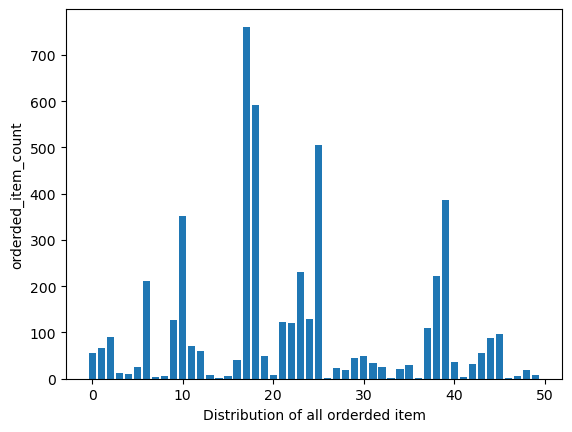

In [11]:
# 시각화로 분석 결과 살펴보기

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align="center")
plt.ylabel("orderded_item_count")
plt.xlabel("Distribution of all orderded item")

plt.show()

## Step 3. 데이터 전처리: 나만의 조력자를 정의

### apply와 lambda 함수를 이용한 데이터 전처리

In [12]:
print(chipo.info())
print('--------------')
print(chipo["item_price"].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None
--------------
0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object


In [13]:
# column 단위 데이터에 apply 함수로 전처리를 적용

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.describe()

,order_id,quantity,item_price
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


In [14]:
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


## Step 4. 탐색적 분석: 스무고개로 분석하는 개념적 탐색

#### 데이터를 이해하기 위한 조금 더 복잡한 질문들로 탐색적 데이터 분석 연습하기
* 주문당 평균 계산금액 출력하기
* 한 주문에 10달러 이상 사용한 주문의 id들 출력하기
* 각 아이템의 가격 구하기
* 가장 비싼 주문에서 item이 몇 개 팔렸는지 구하기
* "Veggie Salad Bowl"이 몇 번 주문되었는지 구하기
* "Chicken Bowl"을 2개 이상 주문한 횟수 구하기

In [15]:
# 주문당 평균 계산금액 출력하기

chipo.groupby("order_id")["item_price"].sum().mean()

18.811428571428568

In [16]:
# 한 주문에 10달러 이상 사용한 id를 출력합니다.

chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]

print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
2                2       16.98
3                2       12.67
4                2       21.00
5                2       13.70
6                2       17.50
7                2       15.70
8                2       10.88
9                3       10.67
10               2       13.20
[   1    2    3 ... 1832 1833 1834]


C:\Users\user\AppData\Local\Temp\ipykernel_11296\1804777055.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chipo_orderid_group = chipo.groupby('order_id').sum()


In [21]:
# 각 아이템의 가격 계산

chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby("item_name").min() # 주문 개수가 1이면서 토핑이 하나도 없는 아이템 가져오기 위해
price_per_item.sort_values(by ="item_price", ascending=False)[:10] # item_price 기준 내림차순 정렬 

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,250,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,501,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,468,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,103,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,230,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,4,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,17,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,26,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


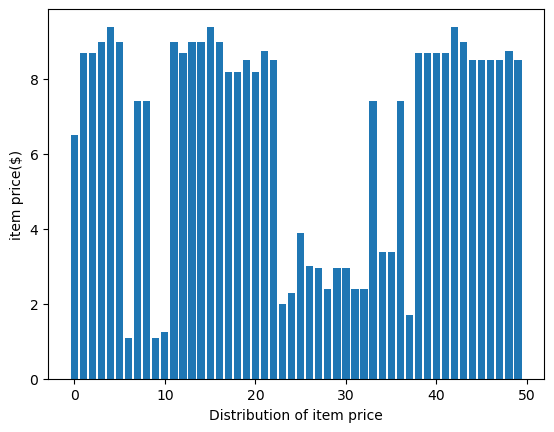

In [28]:
# 아이템 가격 분포 그래프 출력

item_name_list = price_per_item.index.tolist()
# item_name_list
item_price = price_per_item["item_price"].tolist()
# item_price

plt.bar(x_pos, item_price, align="center")
plt.ylabel("item price($)")
plt.xlabel("Distribution of item price")

plt.show()

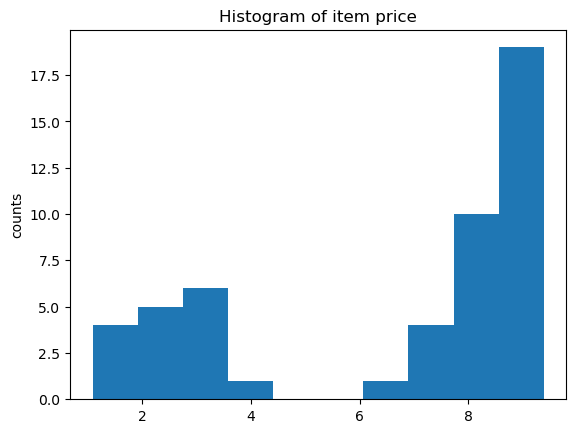

In [29]:
# 아이템 가격 히스토그램 출력
plt.hist(item_price)
plt.ylabel("counts")
plt.title("Histogram of item price")

plt.show()

In [35]:
# "Veggie Salad Bowl" 이 몇 번 주문되었는지 계산

chipo_salad = chipo[chipo["item_name"] == "Veggie Salad Bowl"]
chipo_salad = chipo_salad.drop_duplicates(["item_name", "order_id"]) # 한 주문 내에서 중복 집계된 item_name 삭제

print(len(chipo_salad))
chipo_salad.head(5)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75
